In [202]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
from tabulate import tabulate
from typing import List
from scipy.stats import rankdata
from scipy.stats import ranksums
pd.set_option('display.max_columns', 100)

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# pandas save arrays as str, deconvert them
def fix_arrays(data: pd.DataFrame):
    def str_to_arr(s: str) -> str:
        s = s[1:-1]
        return np.fromstring(s, sep=',')
    means_columns = ['Unreduced_acc','Reduced_acc', 'Clf_unreducted_time', 'Clf_reducted_time','Reduction_time']
    for column in means_columns:
        data[column] = data[column].apply(lambda x: str_to_arr(x))
    data['Name'] = data['Reduction_method'] + '_' + data['Classificator']
    return data

In [205]:
d1 = fix_arrays(pd.read_csv('results/d1_results.csv'))
d3 = fix_arrays(pd.read_csv('results/d3_results.csv'))
d4 = fix_arrays(pd.read_csv('results/d4_results.csv'))
d5 = fix_arrays(pd.read_csv('results/d5_results.csv'))
d6 = fix_arrays(pd.read_csv('results/d6_iris_results.csv'))
d7 = fix_arrays(pd.read_csv('results/d7_wine_results.csv'))
d8 = fix_arrays(pd.read_csv('results/d8 - mushrooms_results.csv'))
d10 = fix_arrays(pd.read_csv('results/d10 - student_alchohol_results.csv'))
d12 = fix_arrays(pd.read_csv('results/d12 - human_results.csv'))
d14 = fix_arrays(pd.read_csv('results/d14_IBM_results.csv'))
d16 = fix_arrays(pd.read_csv('results/d16 - restaurant_results.csv'))
d17 = fix_arrays(pd.read_csv('results/d17_results.csv'))
d18 = fix_arrays(pd.read_csv('results/d18_results.csv'))
d20 = fix_arrays(pd.read_csv('results/d20_results.csv'))
d21 = fix_arrays(pd.read_csv('results/d21_results.csv'))
d22 = fix_arrays(pd.read_csv('results/d22 - student_exams.csv'))
# mnists
d2 = fix_arrays(pd.read_csv('results/d2 - fashion_mnist_results.csv'))
d9 = fix_arrays(pd.read_csv('results/d9 - mnist_sighns_results.csv'))
d11 = fix_arrays(pd.read_csv('results/d11 - mnist_sign_language_results.csv'))
d13 = fix_arrays(pd.read_csv('results/d13 - fer2013_results.csv'))
#
sets = [d1, d3, d4, d5, d6, d7, d8, d10, d12, d14, d16, d17, d18, d20, d21, d22, d2, d9, d11, d13]
sets_name = ['d1', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd10', 'd12', 'd14', 'd16', 'd17', 'd18', 'd20', 'd21', 'd22', 'd2', 'd9', 'd11', 'd13']
sets_shapes = [(60, 16384), (150, 16384), (199, 16384), (19, 16384), (150, 4), (1599, 11), (8124, 109), (395, 28), (250, 561), 
                (1470, 44), (9551, 10), (195, 16384), (200, 16384), (300, 16384), (245, 16384), (1000, 17),
                (250, 784), (250, 784), (250, 784), (250, 2304)]
images = [d1, d3, d4, d5, d17, d18, d20, d21]
images_names = ['d1', 'd3', 'd4', 'd5', 'd17', 'd18', 'd20', 'd21']
images_shapes = [(60, 16384), (150, 16384), (199, 16384), (19, 16384), (195, 16384), (200, 16384), (300, 16384), (245, 16384),]
non_images = [d6, d7, d8, d10, d12, d14, d16, d22, d2, d9, d11, d13]
non_images_names = ['d6', 'd7', 'd8', 'd10', 'd12', 'd14', 'd16', 'd22', 'd2', 'd9', 'd11', 'd13']
non_images_shapes = [(150, 4), (1599, 11), (8124, 109), (395, 28), (250, 561), (1470, 44), (9551, 10), (1000, 17),
                    (250, 784), (250, 784), (250, 784), (250, 2304)]

In [206]:
def tt_test(data: pd.DataFrame):

    alfa = .05
    t_statistic = np.zeros((data.shape[0], data.shape[0]))
    p_value = np.zeros((data.shape[0], data.shape[0]))

    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            t_statistic[i, j], p_value[i, j] = ttest_rel(data['Reduced_acc'][i], data['Reduced_acc'][j])

    names_column = data['Name'].values.reshape(-1, 1)
    t_statistic_table = np.concatenate((names_column, t_statistic), axis=1)
    t_statistic_table = tabulate(t_statistic_table, data['Name'].values, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, data['Name'].values, floatfmt=".2f")

    advantage = np.zeros((data.shape[0], data.shape[0]))
    advantage[t_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
        (names_column, advantage), axis=1), data['Name'].values)

    significance = np.zeros((data.shape[0], data.shape[0]))
    significance[p_value <= alfa] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), data['Name'].values)

    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), data['Name'].values)
    # print("Statistically significantly better:\n", stat_better_table)
    # for i in range(stat_better.shape[0]):
    #     for j in range(stat_better.shape[1]):
    #         if stat_better[i][j]:
    #             print(f"{data['Name'].values[i]} better than {data['Name'].values[j]}")

    # text_file = open(f"{set_name}.txt", "w")
    # text_file.write(stat_better_table)
    # text_file.close()
    b_n = np.array([data['Reduction_method'].values, data['Classificator'].values, significance.sum(axis=1)])
    return pd.DataFrame(data=b_n.T, columns=['R', 'C', 'V'])    

In [207]:
def wilx(sets: List[pd.DataFrame]):
    scores = np.zeros((len(sets), sets[0].shape[0]))
    for i, s in enumerate(sets):
        scores[i] = s['Reduced_acc'].apply(lambda x: x.mean()).values
    from scipy.stats import rankdata
    ranks = []
    for ms in scores:
        ranks.append(rankdata(ms).tolist())
    ranks = np.array(ranks)
    mean_ranks = np.mean(ranks, axis=0)
    alfa = .05
    w_statistic = np.zeros((sets[0].shape[0], sets[0].shape[0]))
    p_value = np.zeros((sets[0].shape[0], sets[0].shape[0]))

    for i in range(sets[0].shape[0]):
        for j in range(sets[0].shape[0]):
            w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])

    headers = list(sets[0]['Name'].values)
    names_column = np.expand_dims(np.array(list(sets[0]['Name'].values)), axis=1)
    w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
    w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    advantage = np.zeros((sets[0].shape[0], sets[0].shape[0]))
    advantage[w_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
        (names_column, advantage), axis=1), headers)
    significance = np.zeros((sets[0].shape[0], sets[0].shape[0]))
    significance[p_value <= alfa] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)

    # text_file = open(f"wilcoxon.txt", "w")
    # text_file.write(significance_table)
    # text_file.close()
    b_n = np.array([sets[0]['Reduction_method'].values, sets[0]['Classificator'].values, significance.sum(axis=1)])
    return pd.DataFrame(data=b_n.T, columns=['R', 'C', 'V'])    


In [208]:
def wilcoxon_test_for_column_pair(sets, cols):
    names = cols
    scores_reduced = np.zeros((len(sets), sets[0].shape[0]))
    scores_unreduced = np.zeros((len(sets), sets[0].shape[0]))
    for i, s in enumerate(sets):
        scores_reduced[i] = s[cols[0]].apply(lambda x: x.mean()).values
        scores_unreduced[i] = s[cols[1]].apply(lambda x: x.mean()).values
    
    wilcoxons = []
    for i in range(scores_reduced.shape[1]):
        wilcoxons.append(np.concatenate(([scores_unreduced[:,i]], [scores_reduced[:, i]]), axis=0).T)
    
    stats = []
    ps = []
    for mean_scores in wilcoxons:
        # print(mean_scores)
        ranks = []
        for ms in mean_scores:
            ranks.append(rankdata(ms).tolist())
        ranks = np.array(ranks)
        alfa = .05
        w_statistic = np.zeros((2, 2))
        p_value = np.zeros((2, 2))
        for i in range(2):
            for j in range(2):
                w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])
        
        headers = list(names)
        names_column = np.expand_dims(np.array(list(names)), axis=1)
        w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
        w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
        p_value_table = np.concatenate((names_column, p_value), axis=1)
        p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
        # print(w_statistic_table)
        # print(p_value_table)

        stats.append(w_statistic[0][1])
        ps.append(p_value[0][1])
        # print("\nw-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)

        # advantage = np.zeros((2, 2))
        # advantage[w_statistic > 0] = 1
        # advantage_table = tabulate(np.concatenate(
        #     (names_column, advantage), axis=1), headers)
        # significance = np.zeros((2, 2))
        # significance[p_value <= alfa] = 1
        # significance_table = tabulate(np.concatenate(
        #     (names_column, significance), axis=1), headers)
        # print(significance_table)
    return stats, ps

In [209]:
# TT FOR EACH SET

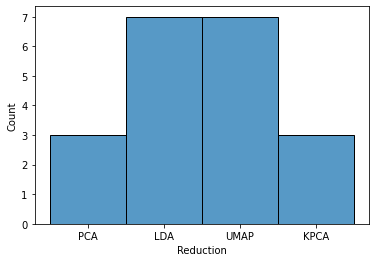

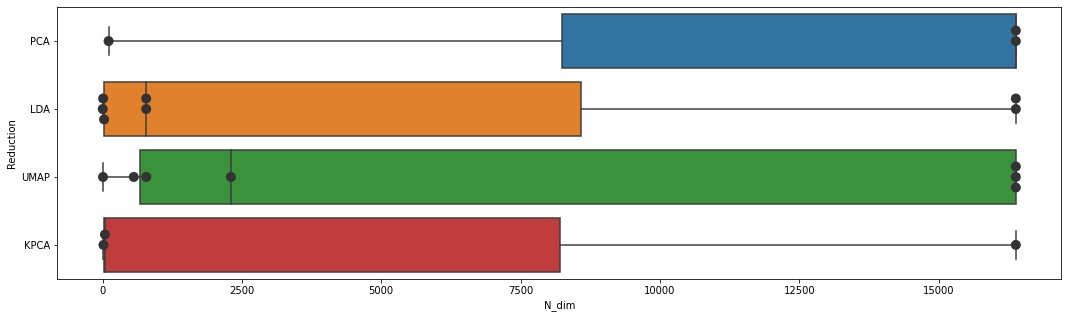

In [210]:
tt_xs = []
tt_shapes = []
for s_name, s_shape,s in zip(sets_name, sets_shapes, sets):
    res_tt = tt_test(s).groupby('R').sum().drop(columns=['C'])
    tt_xs.append(res_tt.idxmax().values[0])
    tt_shapes.append(s_shape[1])
    # print(s_name, s_shape[1])
    # print(res_tt.idxmax().values)
    # print('---------------------------------------------------')
tt_df = pd.DataFrame(data=np.array([tt_xs, tt_shapes]).T, columns=['Reduction', 'N_dim'])
tt_df['N_dim'] = tt_df['N_dim'].apply(lambda x: int(x))
sns.histplot(x='Reduction', data=tt_df)
plt.show()
plt.figure(figsize=(18, 5))
sns.boxplot(x="N_dim", y="Reduction", data=tt_df, whis=np.inf)
sns.swarmplot(data=tt_df, x="N_dim", y="Reduction", size=10, dodge=True, color=".2")
plt.show()

In [211]:
sets_wilx = wilx(sets)
sets_wilx

,R,C,V
0,KPCA,Naive Bayes,0.0
1,LDA,Naive Bayes,3.0
2,PCA,Naive Bayes,0.0
3,UMAP,Naive Bayes,0.0
4,KPCA,Nearest Neighbors,2.0
5,LDA,Nearest Neighbors,0.0
6,PCA,Nearest Neighbors,2.0
7,UMAP,Nearest Neighbors,0.0
8,KPCA,RBF SVM,0.0
9,LDA,RBF SVM,0.0


In [212]:
sets_wilx.groupby('R').sum().drop(columns=['C'])

,V
R,
KPCA,4.0
LDA,6.0
PCA,2.0
UMAP,0.0


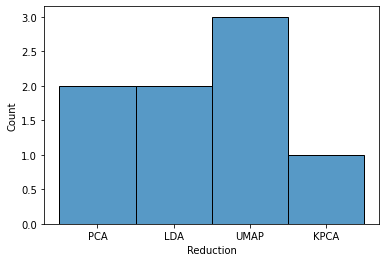

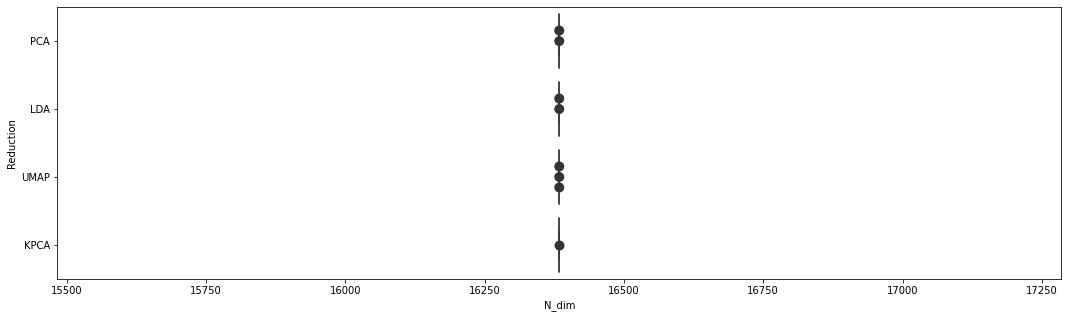

In [213]:
tt_xs = []
tt_shapes = []
for s_name, s_shape,s in zip(images_names, images_shapes, images):
    res_tt = tt_test(s).groupby('R').sum().drop(columns=['C'])
    tt_xs.append(res_tt.idxmax().values[0])
    tt_shapes.append(s_shape[1])
    # print(s_name, s_shape[1])
    # print(res_tt.idxmax().values)
    # print('---------------------------------------------------')
tt_df = pd.DataFrame(data=np.array([tt_xs, tt_shapes]).T, columns=['Reduction', 'N_dim'])
tt_df['N_dim'] = tt_df['N_dim'].apply(lambda x: int(x))
sns.histplot(x='Reduction', data=tt_df)
plt.show()
plt.figure(figsize=(18, 5))
sns.boxplot(x="N_dim", y="Reduction", data=tt_df, whis=np.inf)
sns.swarmplot(data=tt_df, x="N_dim", y="Reduction", size=10, dodge=True, color=".2")
plt.show()

In [214]:
images_wilx = wilx(images)
images_wilx

,R,C,V
0,KPCA,Naive Bayes,0.0
1,LDA,Naive Bayes,1.0
2,PCA,Naive Bayes,0.0
3,UMAP,Naive Bayes,0.0
4,KPCA,Nearest Neighbors,0.0
5,LDA,Nearest Neighbors,1.0
6,PCA,Nearest Neighbors,0.0
7,UMAP,Nearest Neighbors,0.0
8,KPCA,RBF SVM,1.0
9,LDA,RBF SVM,1.0


In [215]:
images_wilx.groupby('R').sum().drop(columns=['C'])

,V
R,
KPCA,2.0
LDA,7.0
PCA,2.0
UMAP,5.0


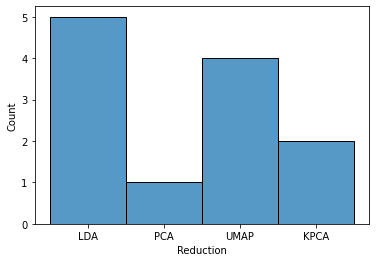

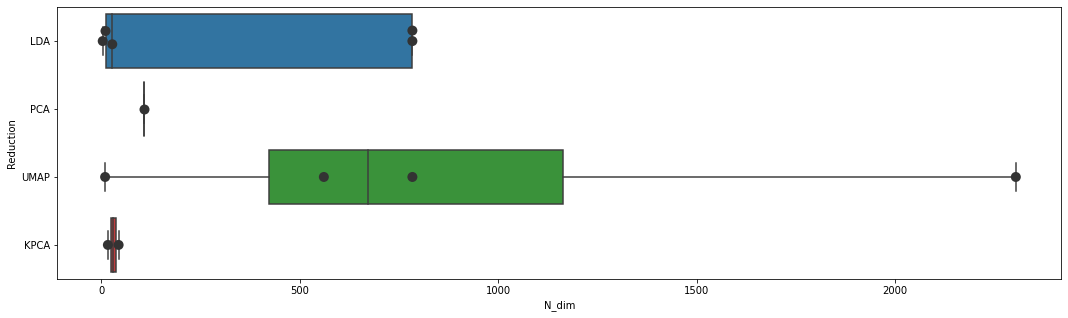

In [216]:
tt_xs = []
tt_shapes = []
for s_name, s_shape,s in zip(non_images_names, non_images_shapes, non_images):
    res_tt = tt_test(s).groupby('R').sum().drop(columns=['C'])
    tt_xs.append(res_tt.idxmax().values[0])
    tt_shapes.append(s_shape[1])
    # print(s_name, s_shape[1])
    # print(res_tt.idxmax().values)
    # print('---------------------------------------------------')
tt_df = pd.DataFrame(data=np.array([tt_xs, tt_shapes]).T, columns=['Reduction', 'N_dim'])
tt_df['N_dim'] = tt_df['N_dim'].apply(lambda x: int(x))
sns.histplot(x='Reduction', data=tt_df)
plt.show()
plt.figure(figsize=(18, 5))
sns.boxplot(x="N_dim", y="Reduction", data=tt_df, whis=np.inf)
sns.swarmplot(data=tt_df, x="N_dim", y="Reduction", size=10, dodge=True, color=".2")
plt.show()

In [217]:
non_images_wilx = wilx(non_images)
non_images_wilx

,R,C,V
0,KPCA,Naive Bayes,1.0
1,LDA,Naive Bayes,5.0
2,PCA,Naive Bayes,0.0
3,UMAP,Naive Bayes,5.0
4,KPCA,Nearest Neighbors,4.0
5,LDA,Nearest Neighbors,0.0
6,PCA,Nearest Neighbors,4.0
7,UMAP,Nearest Neighbors,4.0
8,KPCA,RBF SVM,4.0
9,LDA,RBF SVM,0.0


In [218]:
non_images_wilx.groupby('R').sum().drop(columns=['C'])

,V
R,
KPCA,11.0
LDA,5.0
PCA,7.0
UMAP,11.0


In [219]:
def if_worse(stat, p):
    if stat > 0 and p < 0.05:
        return 1
    if stat < 0 and p < 0.05:
        return -1
    return 0

In [220]:
stats, ps = wilcoxon_test_for_column_pair(sets, ['Reduced_acc','Unreduced_acc'])
wil_for_redclf_df_all = pd.DataFrame(data=np.array([stats, ps]).T, columns=['Stat', 'P'])
wil_for_redclf_df_all['Reduction'] = d1['Reduction_method']
wil_for_redclf_df_all['Classificator'] = d1['Classificator']
wil_for_redclf_df_all['Is_worse']= wil_for_redclf_df_all.apply(lambda row: if_worse(row.Stat, row.P), axis=1)
wil_for_redclf_df_all

,Stat,P,Reduction,Classificator,Is_worse
0,0.541002,0.588506,KPCA,Naive Bayes,0
1,0.000000,1.000000,LDA,Naive Bayes,0
2,0.541002,0.588506,PCA,Naive Bayes,0
3,0.000000,1.000000,UMAP,Naive Bayes,0
4,4.165714,0.000031,KPCA,Nearest Neighbors,1
5,1.420130,0.155570,LDA,Nearest Neighbors,0
6,3.570612,0.000356,PCA,Nearest Neighbors,1
7,4.260389,0.000020,UMAP,Nearest Neighbors,1
8,3.246011,0.001170,KPCA,RBF SVM,1
9,2.705009,0.006830,LDA,RBF SVM,1


In [221]:
wil_for_redclf_df_all.groupby('Reduction').sum().drop(columns=['Stat', 'P'])

,Is_worse
Reduction,
KPCA,3
LDA,1
PCA,3
UMAP,3


In [222]:
stats, ps = wilcoxon_test_for_column_pair(images, ['Reduced_acc','Unreduced_acc'])
wil_for_redclf_df_images = pd.DataFrame(data=np.array([stats, ps]).T, columns=['Stat', 'P'])
wil_for_redclf_df_images['Reduction'] = d1['Reduction_method']
wil_for_redclf_df_images['Classificator'] = d1['Classificator']
wil_for_redclf_df_images['Is_worse']= wil_for_redclf_df_images.apply(lambda row: if_worse(row.Stat, row.P), axis=1)
wil_for_redclf_df_images

,Stat,P,Reduction,Classificator,Is_worse
0,1.680336,0.092892,KPCA,Naive Bayes,0
1,1.680336,0.092892,LDA,Naive Bayes,0
2,1.680336,0.092892,PCA,Naive Bayes,0
3,1.680336,0.092892,UMAP,Naive Bayes,0
4,1.417784,0.156254,KPCA,Nearest Neighbors,0
5,-0.472595,0.636502,LDA,Nearest Neighbors,0
6,1.417784,0.156254,PCA,Nearest Neighbors,0
7,3.308162,0.000939,UMAP,Nearest Neighbors,1
8,3.360672,0.000778,KPCA,RBF SVM,1
9,3.360672,0.000778,LDA,RBF SVM,1


In [223]:
wil_for_redclf_df_images.groupby('Reduction').sum().drop(columns=['Stat', 'P'])

,Is_worse
Reduction,
KPCA,1
LDA,1
PCA,1
UMAP,3


In [224]:
stats, ps = wilcoxon_test_for_column_pair(non_images, ['Reduced_acc','Unreduced_acc'])
wil_for_redclf_df_non_images = pd.DataFrame(data=np.array([stats, ps]).T, columns=['Stat', 'P'])
wil_for_redclf_df_non_images['Reduction'] = d1['Reduction_method']
wil_for_redclf_df_non_images['Classificator'] = d1['Classificator']
wil_for_redclf_df_non_images['Is_worse']= wil_for_redclf_df_non_images.apply(lambda row: if_worse(row.Stat, row.P), axis=1)
wil_for_redclf_df_non_images

,Stat,P,Reduction,Classificator,Is_worse
0,-0.692820,0.488422,KPCA,Naive Bayes,0
1,-1.385641,0.165857,LDA,Naive Bayes,0
2,-0.692820,0.488422,PCA,Naive Bayes,0
3,-1.385641,0.165857,UMAP,Naive Bayes,0
4,4.128054,0.000037,KPCA,Nearest Neighbors,1
5,2.078461,0.037667,LDA,Nearest Neighbors,1
6,3.377499,0.000731,PCA,Nearest Neighbors,1
7,2.771281,0.005584,UMAP,Nearest Neighbors,1
8,1.385641,0.165857,KPCA,RBF SVM,0
9,0.692820,0.488422,LDA,RBF SVM,0


In [225]:
wil_for_redclf_df_non_images.groupby('Reduction').sum().drop(columns=['Stat', 'P'])

,Is_worse
Reduction,
KPCA,2
LDA,1
PCA,1
UMAP,2
